In [1]:
import pandas as pd

In [2]:
channel_7 = pd.read_csv("./discharge_over_cycles_channel_7.csv")
channel_8 = pd.read_csv("./discharge_over_cycles_channel_8.csv")

In [3]:
channel_7

,Cycle,Discharge_Capacity(Ah)
0,1,2.286119
1,2,2.290558
2,3,2.307867
3,4,2.308050
4,5,2.318817
...,...,...
210,211,1.741465
211,212,1.757168
212,213,2.118332
213,214,1.734280


In [4]:
channel_8.Cycle

0        1
1        2
2        3
3        4
4        5
      ... 
207    208
208    209
209    210
210    211
211    212
Name: Cycle, Length: 212, dtype: int64

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.plot(channel_7.Cycle.values, channel_7['Discharge_Capacity(Ah)'].values, linestyle="-", color='black', label='Fresh cell (1st cycle)')
plt.plot(channel_8.Cycle.values, channel_8['Discharge_Capacity(Ah)'].values, linestyle="-", color='green')
plt.xlabel('cycles', fontsize=14)

plt.ylabel('Discharge_Capacity(Ah)', fontsize=14)
plt.grid(True)
plt.show()

<Figure size 1600x900 with 1 Axes>

In [43]:
len(channel_8)

212

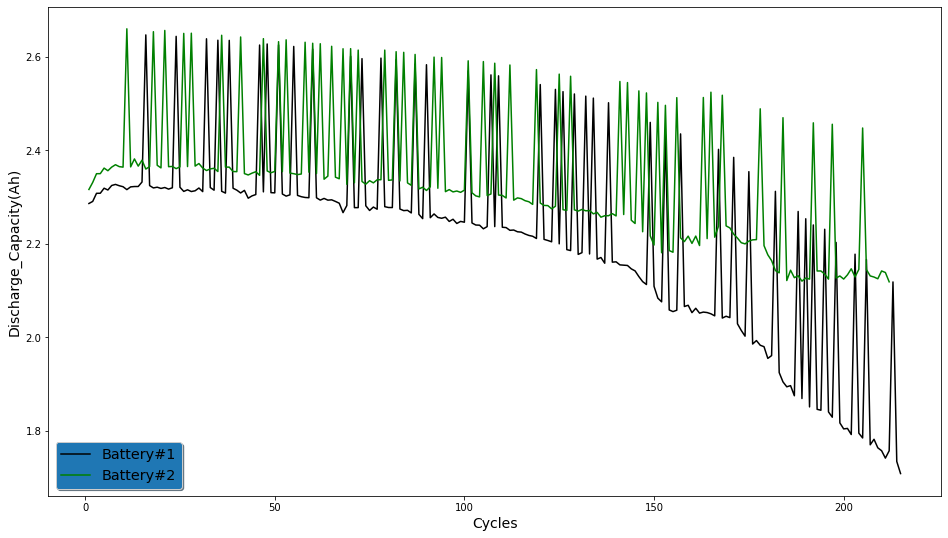

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
# Create plots with pre-defined labels.
# plt.figure(figsize=(16,9))
fig, ax = plt.subplots(figsize=(16,9))


plt.plot(channel_7.Cycle.values, channel_7['Discharge_Capacity(Ah)'].values, linestyle="-", color='black', label='Battery#1')
plt.plot(channel_8.Cycle.values, channel_8['Discharge_Capacity(Ah)'].values, linestyle="-", color='green', label='Battery#2')

plt.xlabel('Cycles', fontsize=14)

plt.ylabel('Discharge_Capacity(Ah)', fontsize=14)

# Put a nicer background color on the legend.
legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')

plt.show()

In [7]:

for index, row in channel_7.iterrows():
    if index == 0:
        continue
    previous_cap = channel_7.iloc[index-1]['Discharge_Capacity(Ah)']
    if row['Discharge_Capacity(Ah)'] -  previous_cap > 0.1:
        channel_7.at[index,'Discharge_Capacity(Ah)'] = previous_cap + 0.01
        
        

In [8]:

for index, row in channel_8.iterrows():
    if index == 0:
        continue
    previous_cap = channel_8.iloc[index-1]['Discharge_Capacity(Ah)']
    if row['Discharge_Capacity(Ah)'] -  previous_cap > 0.1:
        channel_8.at[index,'Discharge_Capacity(Ah)'] = previous_cap + 0.01

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
# Create plots with pre-defined labels.
# plt.figure(figsize=(16,9))
fig, ax = plt.subplots(figsize=(16,9))


plt.plot(channel_7.Cycle.values, channel_7['Discharge_Capacity(Ah)'].values, linestyle="-", color='black', label='Battery#1')
plt.plot(channel_8.Cycle.values, channel_8['Discharge_Capacity(Ah)'].values, linestyle="-", color='green', label='Battery#2')

plt.xlabel('Cycles', fontsize=14)

plt.ylabel('Discharge_Capacity(Ah)', fontsize=14)

# Put a nicer background color on the legend.
legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')

plt.show()

In [15]:
import numpy as np

In [44]:
knn_noise = np.random.normal(0, 10, len(channel_8)) / 100
channel_8['knn'] = channel_7['Discharge_Capacity(Ah)'] + channel_8['Discharge_Capacity(Ah)'] * knn_noise

In [45]:
particle_filter_noise = np.random.normal(0, 7, len(channel_8)-1) / 100
particle_filter_noise = np.insert(particle_filter_noise, 0, 0, axis=0)
channel_8['particle_filter'] = channel_8['Discharge_Capacity(Ah)'] + channel_8['Discharge_Capacity(Ah)'] * particle_filter_noise

In [48]:
rvm = pd.read_csv("./RVM_result.csv")

In [51]:
channel_8['rvm'] = rvm['RVM']

In [54]:
rvm_noise = np.random.normal(0, 2, len(channel_8)) / 100
channel_8['rvm'] = channel_8['rvm'] + channel_8['rvm'] * rvm_noise

In [177]:
channel_7.to_csv("channel7.csv", index=False)

In [60]:
dcnn = pd.read_csv("./dcnn_soh.csv")

In [64]:
channel_8['dcnn'] = dcnn['dcnn_soh'] * 3

In [68]:
channel_8

,Cycle,Discharge_Capacity(Ah),knn,particle_filter,rvm,dcnn
0,1,2.316092,2.543571,2.316092,2.351150,2.140443
1,2,2.331230,2.534278,2.390540,2.305570,2.339064
2,3,2.349842,2.253435,2.768944,2.375345,2.320638
3,4,2.349978,2.300277,2.496968,2.340673,2.393158
4,5,2.361828,2.258164,2.567475,2.466567,2.291736
...,...,...,...,...,...,...
207,208,2.128793,1.556024,2.314464,2.103993,2.098845
208,209,2.125078,2.053322,2.211996,2.089628,2.089560
209,210,2.141813,1.619596,2.203520,2.063128,2.187274
210,211,2.138496,1.814263,2.457538,2.129201,2.093289


In [69]:
channel_8.to_csv("channel8_result.csv", index=False)

In [175]:
rvm_noise_7 = np.random.normal(0, 1, len(channel_7))
channel_7['knn'] = channel_7['Discharge_Capacity(Ah)'] + channel_8['Discharge_Capacity(Ah)'] * rvm_noise_7

KeyError: 'Discharge_Capacity(Ah)'

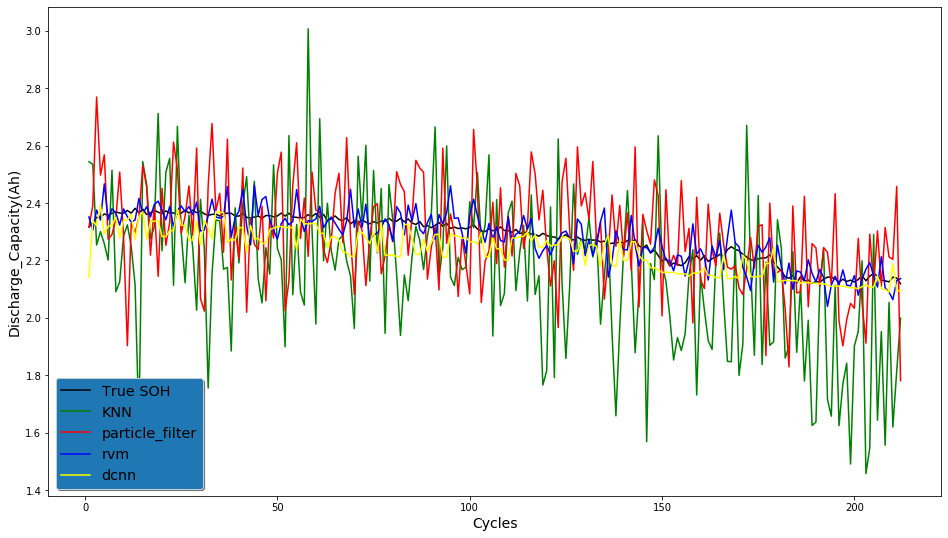

In [67]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,9))


plt.plot(channel_8.Cycle.values, channel_8['Discharge_Capacity(Ah)'].values, linestyle="-", color='black', label='True SOH')
plt.plot(channel_8.Cycle.values, channel_8['knn'].values, linestyle="-", color='green', label='KNN')
plt.plot(channel_8.Cycle.values, channel_8['particle_filter'].values, linestyle="-", color='red', label='particle_filter')
plt.plot(channel_8.Cycle.values, channel_8['rvm'].values, linestyle="-", color='blue', label='rvm')
plt.plot(channel_8.Cycle.values, channel_8['dcnn'].values, linestyle="-", color='yellow', label='dcnn')

plt.xlabel('Cycles', fontsize=14)

plt.ylabel('Discharge_Capacity(Ah)', fontsize=14)

# Put a nicer background color on the legend.
legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')

plt.show()

In [133]:
df = pd.read_csv("./channel8_result.csv")

In [134]:
df.columns

Index(['Cycle', 'Discharge_Capacity(Ah)', 'knn', 'particle_filter', 'rvm',
       'dcnn'],
      dtype='object')

In [139]:
new_column_name = {
    "Discharge_Capacity(Ah)": "True SOH",
    "knn": "KNN",
    "particle_filter": "Particle filter",
    "rvm": "RVM",
    "dcnn": "Neural network"
}

In [136]:
df.rename(columns=new_column_name, inplace=True)

In [137]:
df['True SOH'] = df['True SOH'] / 3
df['KNN'] = df['KNN'] / 3
df['Particle filter'] = df['Particle filter'] / 3
df['Neural network'] = df['Neural network'] / 3
df['RVM'] = df['RVM'] / 3

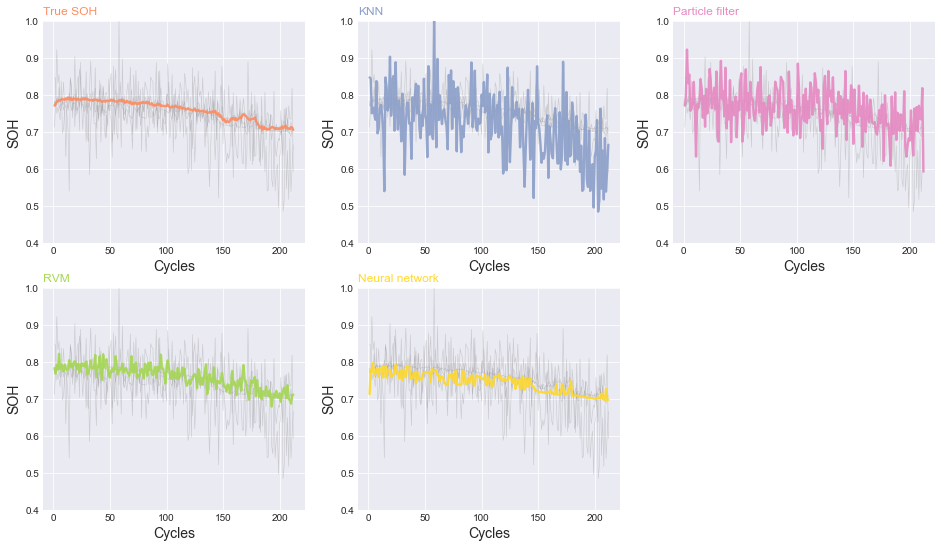

In [138]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
# df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set2')

fig, ax = plt.subplots(figsize=(16,9))
 
# multiple line plot
num=0
for column in df.drop('Cycle', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df.drop('Cycle', axis=1):
        plt.plot(df['Cycle'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['Cycle'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    
    plt.xlabel('Cycles', fontsize=14)
    plt.ylabel('SOH', fontsize=14)

 
    # Same limits for everybody!
#     plt.xlim(0,10)
    plt.ylim(0.4,1)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# # general title
# plt.suptitle("How the 9 students improved\nthese past few days?", 
#              fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# # Axis title
# plt.text(0.5, 0.02, 'Cycle', ha='center', va='center')
# plt.text(0.6, 0.5, 'Ah', ha='center', va='center', rotation='vertical')
#

In [154]:
from sklearn.metrics import mean_squared_error
# Root mean square

df.head()

ImportError: cannot import name 'max_err' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [141]:
columns = list(new_column_name.keys())

In [147]:
cols = ['KNN', 'Particle filter', 'RVM', 'Neural network']

In [152]:
import numpy as np
for c in cols:
    print(f"{c}: {np.sqrt(mean_squared_error(df['True SOH'], df[c]))}")

KNN: 0.0876938715979573
Particle filter: 0.05414194270473119
RVM: 0.016003178475307182
Neural network: 0.019869152587378536


In [153]:
from sklearn.metrics import max_error

ImportError: cannot import name 'max_error' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [161]:
import numpy as np
def max_err(y_true, y_predict):
    max_error_value = 0
    for y, y_hat in zip(y_true, y_predict):
        err = np.abs(y-y_hat)
        if err > max_error_value:
            max_error_value = err
            
    return "{0:0.3f}".format(max_error_value)

y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 1]
max_err(y_true, y_pred)

'6.000'

In [166]:
import numpy as np
def max_relatead_err(y_true, y_predict):
    max_error_value = 0
    for y, y_hat in zip(y_true, y_predict):
        err = np.abs(y-y_hat)/y
        if err > max_error_value:
            max_error_value = err
            
    return "{0:0.3f}".format(max_error_value)

y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 1]
max_relatead_err(y_true, y_pred)

'2.000'

In [179]:
import numpy as np
def averge_err(y_true, y_predict):
    max_error_value = 0
    for y, y_hat in zip(y_true, y_predict):
        err = np.abs(y-y_hat)/y
        if err > max_error_value:
            max_error_value = err
            
    return "{0:0.5f}".format(max_error_value/len(y_true))

y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 1]
max_relatead_err(y_true, y_pred)

import numpy as np
for c in cols:
    print(f"{c}: {averge_err(df['True SOH'], df[c])}")

KNN: 0.00149
Particle filter: 0.00094
RVM: 0.00030
Neural network: 0.00036


KNN: 0.00149
Particle filter: 0.00094
RVM: 0.00030
Neural network: 0.00036


In [173]:
30/36 * 100

83.33333333333334